<a href="https://colab.research.google.com/github/ThitiwatJtrsn/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **วิเคราะห์ข้อมูล nndb_flat.csv และ pizza.csv ด้วยความรู้ที่เรียนมาในบทที่ 1-3**

## **nnbd_flat.csv**


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('nndb_flat.csv') #อัปโหลดข้อมูลเพื่อเรียกใช้
data.head(10) #เรียกใช้ข้อมูลจากทั้งหมดมา 10 ตัวอย่าง

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


###**ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions**

โดยใช้คำสั่ง .shape

```
.shape
```

In [5]:
data.shape #เช็คจำนวนแถวและคอลัมน์

(8618, 45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f141683dd10>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

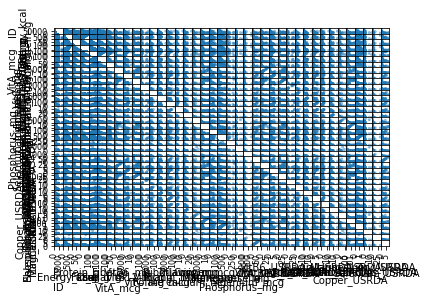

In [6]:
pd.plotting.scatter_matrix(data)

###**ผลของข้อมูล**


ข้อมูลมีตัว Dimension จำนวนมาก เนื่องจากมีบางคอลัมน์ที่มีข้อมูลซ้ำกันอยู่

###**แก้ปัญหาโดย**

ทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

In [7]:
new_data = data.iloc[:,7:] #เลือกข้อมูลตัวที่ 7
new_data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


###**ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน โดยการใช้ Numpy**

In [8]:
import numpy as np

In [9]:
corre = np.corrcoef(new_data.to_numpy().T) #ดูค่า correlation

In [10]:
corre.shape

(38, 38)

In [11]:
corre

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

**เมื่อแสดงค่า correlation ออกมาแล้ว หลังจากนั้นใช้คำสั่งวนลูปเพื่อดูว่ามีค่าซ้ำกันไหม**

In [18]:
for i in range(corre.shape[0]): 
    for j in range(corre.shape[1]):
        if (i !=j) and (corre[i,j] == 1.):
            print(f'row = {i} column = {j} correcoef = {corre[i,j]}')

row = 10 column = 27 correcoef = 1.0
row = 12 column = 29 correcoef = 1.0
row = 13 column = 30 correcoef = 1.0
row = 14 column = 31 correcoef = 1.0
row = 18 column = 34 correcoef = 1.0
row = 20 column = 35 correcoef = 1.0
row = 22 column = 37 correcoef = 1.0
row = 27 column = 10 correcoef = 1.0
row = 29 column = 12 correcoef = 1.0
row = 30 column = 13 correcoef = 1.0
row = 31 column = 14 correcoef = 1.0
row = 34 column = 18 correcoef = 1.0
row = 35 column = 20 correcoef = 1.0
row = 37 column = 22 correcoef = 1.0


**จะเห็นว่าผลรันที่แสดงออกมามีค่าซ้ำกัน**

In [19]:
new_data.iloc[:5,10:30] 

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


###**นำ Data ไป plot graph**
โดยใช้

```
import matplotlib.pyplot as plt
```

**เพื่อดูแนวโน้มของข้อมูล**

In [20]:
import matplotlib.pyplot as plt

###**data ที่มี correlation เป็น 1**

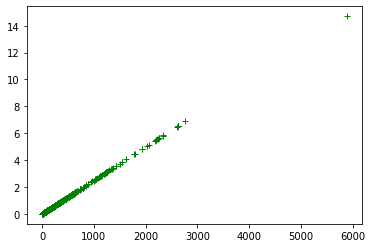

In [21]:
plt.plot(new_data.iloc[:,11],new_data.iloc[:,28],'g+')


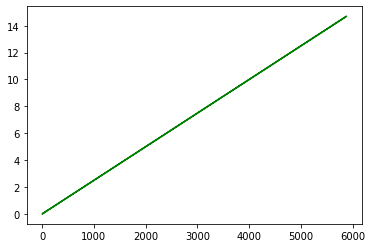

In [22]:
plt.plot(new_data.iloc[:,11],new_data.iloc[:,28],'g') 
#จะสามารถเห็นได้ชัดเจนกว่า

**เพราะเป็นข้อมูลที่มาจากที่เดียวกัน ค่า correlation จะเป็นเส้นตรง**

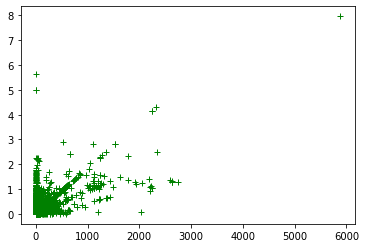

In [23]:
plt.plot(new_data.iloc[:,11],new_data.iloc[:,29],'g+')


###**ลบ column ซ้ำ**

In [24]:
new_data.columns.str.contains('_USRDA') #หา columns ที่มี _USRDA ถ้ามีจะเป็น ture ไม่มีจะเป็น false

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

**จากผลรันจะเห็นว่ามีคอลัมน์ที่มีค่าเป็น true อยู่ 15 คอลัมน์ ทำการหา '.valuse'**

In [25]:
new_data.columns[new_data.columns.str.contains('_USRDA')].values


array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [26]:
new_data.drop(new_data.columns[new_data.columns.str.contains('_USRDA')].values, axis=1)


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


###**ลบ columns ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น**

In [27]:
data_droppedI = new_data.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_droppedI

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [28]:
data_droppedII = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_droppedII

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


###**ทดลอง plot กราฟ parallel coordinate**

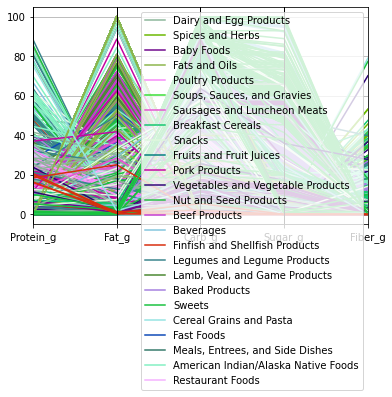

In [29]:
pd.plotting.parallel_coordinates(data_droppedII,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])
#data มี dimension มากเกินไป จึงต้องทำ PCA เพื่อลดจำนวนของข้อมูล

###**ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล**

In [30]:
from sklearn.decomposition import PCA 

In [31]:
pca = PCA(n_components=2) #เพื่อกำหนดว่าจะจำแนกแค่ 2

In [32]:
new_pca = pca.fit_transform(data_droppedI.to_numpy())

In [33]:
new_pca.shape

(8618, 2)

In [34]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

###**ดูว่ามี food group อะไรบ้าง**


In [35]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

###**สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้**

In [36]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่า สมาชิกจากน้อยไปมาก
color_list = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list:
        color_list[each_fg] = num
        num += 1

In [37]:
color_list


{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

###**แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด**


In [38]:
data_droppedIII = data_droppedII.replace(color_list)


In [39]:
data_droppedIII


,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


###**plot scatter เพื่อดูการกระจายข้อมูล**

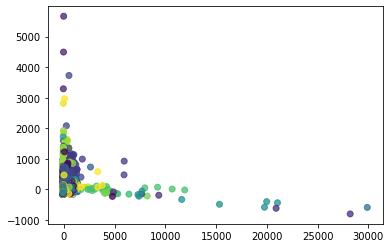

In [40]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_droppedIII['FoodGroup'],alpha=0.75)
#กำหนดให้แอลฟ่าเท่ากับ 0.75

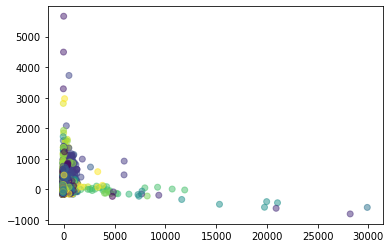

In [41]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_droppedIII['FoodGroup'],alpha=0.5)
#กำหนดให้แอลฟ่าเท่ากับ 0.5

###**ทดลอง เปรียบเทียบค่าสารอาหาร Beverages และ Restaurant Foods**




In [42]:
br = data_droppedIII[(data_droppedIII['FoodGroup']==4) | (data_droppedIII['FoodGroup']==18)] 
br

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
4151,4,43.0,0.46,0.00,3.55,0.00,0.0,0.0,0.046,0.02,0.0,6.0,4.0,0.005,0.02,0.008,0.6,0.000000,0.027059,0.008333,0.000000,0.000000,0.0150,0.032063,0.019231,0.004167,0.003333,0.000006,0.014286,0.020000,0.010909,0.000909
4152,4,41.0,0.36,0.00,2.97,0.00,0.0,0.0,0.000,0.00,0.0,0.0,4.0,0.003,0.00,0.009,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.003333,0.000003,0.016667,0.018571,0.000000,0.000000
4153,4,28.0,0.20,0.00,0.87,0.00,0.0,0.0,0.000,0.00,0.0,0.0,4.0,0.001,0.00,0.007,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.003333,0.000001,0.014286,0.000000,0.000000,0.000909
4154,4,29.0,0.24,0.00,1.64,0.09,0.0,0.0,0.034,0.02,0.0,6.0,4.0,0.006,0.03,0.006,0.4,0.000000,0.020000,0.008333,0.000000,0.000000,0.0150,0.024438,0.011538,0.004167,0.003333,0.000007,0.011905,0.017143,0.007273,0.000909
4155,4,29.0,0.25,0.00,1.30,0.00,0.0,0.0,0.000,0.00,0.0,0.0,3.0,0.002,0.00,0.006,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.002500,0.000002,0.016667,0.015714,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,4,509.0,1.96,29.10,59.94,59.00,0.5,1.0,0.000,0.00,0.0,1.0,18.0,0.011,0.06,0.011,0.9,0.001111,0.000000,0.000000,0.000000,0.017333,0.0025,0.011750,0.000000,0.000000,0.015000,0.000012,0.004762,0.192857,0.016364,0.001818
8560,4,19.0,0.10,0.00,4.70,4.60,0.1,0.0,0.019,0.00,32.0,0.0,10.0,0.007,0.06,0.014,0.1,0.000000,0.011176,0.000000,0.355556,0.018000,0.0000,0.001750,0.005385,0.002500,0.008333,0.000008,0.007143,0.001429,0.001818,0.001818
8572,4,134.0,0.50,0.00,5.00,0.00,0.0,0.0,0.000,0.00,0.0,0.0,5.0,0.009,0.10,0.000,1.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.004167,0.000010,0.014286,0.008571,0.025455,0.001818
8580,4,141.0,5.16,4.52,19.88,8.33,0.0,149.0,0.198,0.60,11.9,67.0,79.0,0.198,1.79,0.516,7.1,0.165556,0.116471,0.250000,0.132222,0.089333,0.1675,0.124000,0.131538,0.125833,0.065833,0.000220,0.095238,0.112857,0.129091,0.137273


In [44]:
pca = PCA(n_components=2)
newbr_pca = pca.fit_transform(br.iloc[:,1:].to_numpy())

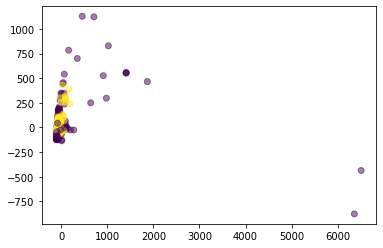

In [46]:
plt.scatter(newbr_pca[:,0],newbr_pca[:,1],c = br['FoodGroup'],alpha=0.5)


In [48]:
Bever_pca = pca.transform(br[br['FoodGroup']==4].iloc[:,1:].to_numpy())
RF_pca = pca.transform(br[br['FoodGroup']==18].iloc[:,1:].to_numpy())

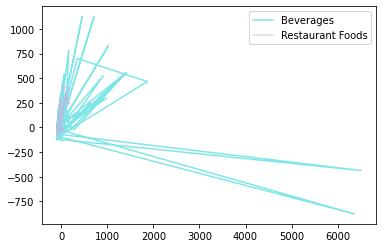

In [79]:
plt.plot(Bever_pca[:,0],Bever_pca[:,1],'DARKTURQUOISE',alpha=0.5,label='Beverages')
plt.plot(RF_pca[:,0],RF_pca[:,1],'PLUM',alpha=0.5,label='Restaurant Foods')
plt.legend()

###**Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน**

In [81]:
pca.explained_variance_ratio_

array([0.82620473, 0.10115912])

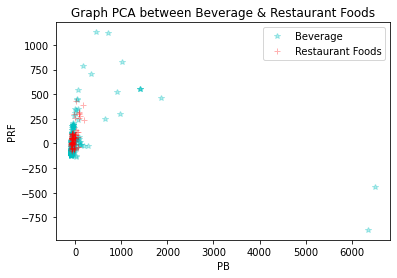

In [88]:
plt.plot(Bever_pca[:,0],Bever_pca[:,1],'c*',alpha=0.3,label='Beverage')
plt.plot(RF_pca[:,0],RF_pca[:,1],'r+',alpha=0.3,label='Restaurant Foods')
plt.legend()
plt.title('Graph PCA between Beverage & Restaurant Foods') #กำหนดชื่อกราฟ
plt.xlabel('PB'); #กำหนดชื่อแกน y
plt.ylabel('PRF'); #กำหนดชื่อแกน x

**กล่าวได้ว่าตัวแทนข้อมูลนั้น เป็นตัวแทนที่ดี ด้วยระดับที่ 92.73 % จากการทำ PCA or Principal Components Analysis จะเห็นว่า Components สามารถ explain variance ได้มาก ซึ่งอาจเป็นตัวแทนที่ Decompose แล้ว**

##**pizza.csv**

In [89]:
import pandas as pd

In [90]:
data = pd.read_csv('Pizza.csv')
data.head(10)#แสดงข้อมูล 10 ตัว 

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


###**ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions**

โดยใช้คำสั่ง .shape

```
.shape
```

In [91]:
data.shape #เช็คจำนวนแถวและคอลัมน์

(300, 9)

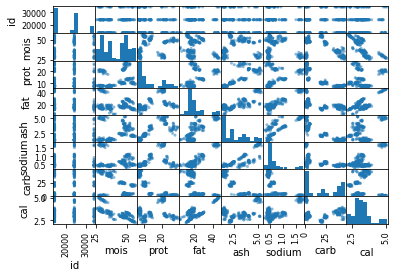

In [95]:
pd.plotting.scatter_matrix(data);

###**ผลของข้อมูล**


ข้อมูลมีตัว Dimension จำนวนมาก เนื่องจากมีบางคอลัมน์ที่มีข้อมูลซ้ำกันอยู่

###**แก้ปัญหาโดย**

ทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

In [94]:
newdata = data.iloc[:,1:] 
newdata.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


###**ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน โดยการใช้ Numpy**

In [99]:
import numpy as np

In [101]:
corre = np.corrcoef(newdata.to_numpy().T) #ดูค่า correlation


In [102]:
corre.shape

(8, 8)

In [103]:
corre #แสดงค่า correlation


array([[ 1.        ,  0.03259505, -0.07648546, -0.00486006, -0.03407156,
        -0.01515608,  0.01496614, -0.02120862],
       [ 0.03259505,  1.        ,  0.36024768, -0.17131821,  0.26555552,
        -0.1022789 , -0.59180165, -0.76444054],
       [-0.07648546,  0.36024768,  1.        ,  0.49800167,  0.8238437 ,
         0.42912952, -0.85354226,  0.0702581 ],
       [-0.00486006, -0.17131821,  0.49800167,  1.        ,  0.79163396,
         0.93332522, -0.64023817,  0.7645671 ],
       [-0.03407156,  0.26555552,  0.8238437 ,  0.79163396,  1.        ,
         0.80812215, -0.89898837,  0.32646845],
       [-0.01515608, -0.1022789 ,  0.42912952,  0.93332522,  0.80812215,
         1.        , -0.62017634,  0.6719575 ],
       [ 0.01496614, -0.59180165, -0.85354226, -0.64023817, -0.89898837,
        -0.62017634,  1.        , -0.02348458],
       [-0.02120862, -0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,
         0.6719575 , -0.02348458,  1.        ]])

**เมื่อแสดงค่า correlation ออกมาแล้ว หลังจากนั้นใช้คำสั่งวนลูปเพื่อดูว่ามีค่าซ้ำกันไหม**

In [109]:
for i in range(corre.shape[0]): 
    for j in range(corre.shape[1]):
        if (i !=j) and (corre[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corre[i,j]}')#เนื่องจากไม่มีค่าที่ซ้ำกันเลย จึงรันแล้วไม่พบแล้วไม่พบอะไร


###**ไม่มีค่าที่ซ้ำกันเลย**
เลยสร้างตารางใหม่แล้วลบ column ที่ไม่ใช่ตัวเลขออก

In [110]:
data_droppedI = data.drop(['brand','id'], axis=1) #ลบ column brand และ id ออกจากตาราง
data_droppedI

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [115]:
data_droppedII = data.drop(['id'], axis=1) #ลบแค่ column id เพราะต้องเอา brand แต่ละ brand มาเปรียบเทียบในกราฟ
data_droppedII

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


###**นำ Data ไป plot graph**
โดยใช้

```
import matplotlib.pyplot as plt
```

**เพื่อดูแนวโน้มของข้อมูล**

In [112]:
import matplotlib.pyplot as plt

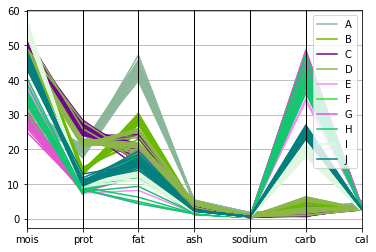

In [117]:
pd.plotting.parallel_coordinates(data_droppedII, 'brand',cols=['mois', 'prot',	'fat',	'ash',	'sodium', 'carb', 'cal']) #พลอตกราฟสารอาหารของ brand ตั้งแต่ brand A-J

###**ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล**

In [118]:
from sklearn.decomposition import PCA


In [119]:
pca = PCA(n_components=2) #เพื่อกำหนดว่าจะจำแนกเป็นแค่ 2 ตามที่เรียน

In [123]:
new_pca = pca.fit_transform(data_droppedI.to_numpy())

In [124]:
new_pca.shape


(300, 2)

In [125]:
new_pca


array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

###**ดูว่ามี Brand อะไรบ้าง**

In [126]:
Bd = set(data['brand'])
Bd

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

###**สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้**

In [129]:
BdI = list(Bd)  #เพื่อแปลงข้อมูลที่เป็นข้อความเป็นตัวเลข
BdI.sort() #เพื่อจัดเรียงข้อมูล
color_list = {}
num = 0
for each_b in BdI:#ใช้คำสั่งวนลูป เพื่อใช้จัดเก็บข้อมูล
    if each_b not in color_list:
        color_list[each_b] = num
        num += 1

In [130]:
color_list


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

###**แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด**


In [131]:
data_droppedIII = data_droppedII.replace(color_list)


In [132]:
data_droppedIII

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


**ไม่ต้อง import matplotlib.pyplot as plt ใหม่**

###**plot scatter เพื่อดูการกระจายข้อมูล**

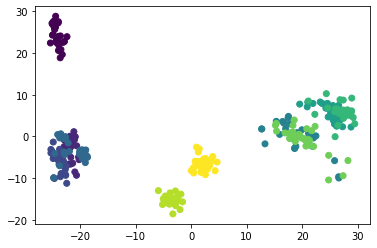

In [133]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_droppedIII['brand']) #วาดแผนภาพแบบกระจาย


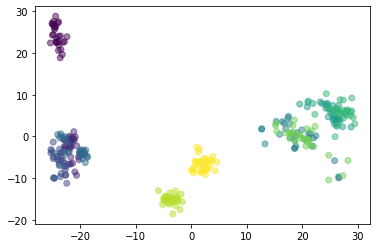

In [134]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_droppedIII['brand'],alpha=0.5) #alpha คือความโปร่งใส


###**ทดลอง เปรียบเทียบค่าสารอาหาร C และ I**




In [135]:
CI = data_droppedIII[(data_droppedIII['brand']==2) | (data_droppedIII['brand']==8)] 
CI

,brand,mois,prot,fat,ash,sodium,carb,cal
60,2,48.40,26.05,21.40,3.44,0.50,0.71,3.00
61,2,48.69,28.48,17.37,3.53,0.43,1.93,2.78
62,2,48.88,25.23,20.89,3.22,0.47,1.78,2.96
63,2,48.97,25.63,19.28,3.48,0.55,2.64,2.87
64,2,48.84,23.98,23.37,3.00,0.52,0.81,3.09
65,2,49.73,25.65,19.98,2.51,0.52,2.13,2.91
66,2,50.18,28.30,15.79,3.47,0.45,2.26,2.64
67,2,48.15,27.98,18.69,3.58,0.48,1.70,2.87
68,2,49.72,27.31,16.89,3.08,0.25,3.00,2.73
69,2,51.59,26.24,16.41,3.61,0.60,2.15,2.61


In [138]:
pca = PCA(n_components=2) #ต้องการเปรียบเทียบ brand แค่ 2 brand จึงใช้แค่ 2 dimansion
new_pca2 = pca.fit_transform(CI.iloc[:,1:].to_numpy())

In [143]:
C_pca = pca.transform(CI[CI['brand']==2].iloc[:,1:].to_numpy())
I_pca = pca.transform(CI[CI['brand']==8].iloc[:,1:].to_numpy())

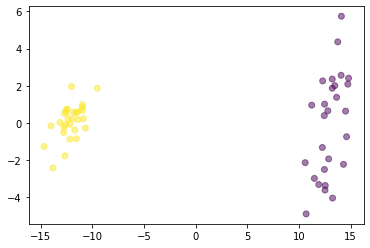

In [144]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = CI['brand'],alpha=0.5)


**จัดกราฟโดยใส่ระบุกราฟ และแกนทั้งสองข้าง**

In [141]:
pca.explained_variance_ratio_


array([0.96835866, 0.024459  ])

**จากข้อมูลข้างต้น จะคิดได้เป็น 96.83% กับ 2.44% ซึ่งคิดเป็น 99.27%**


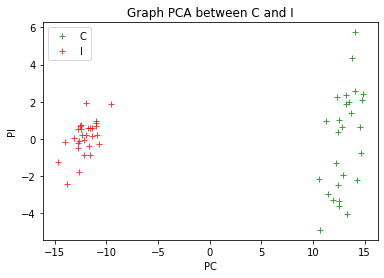

In [147]:
plt.plot(C_pca[:,0],C_pca[:,1],'g+',alpha=0.75,label='C')
plt.plot(I_pca[:,0],I_pca[:,1],'r+',alpha=0.75,label='I')
plt.legend()
plt.title('Graph PCA between C and I') #กำหนดชื่อกราฟ
plt.xlabel('PC'); #กำหนดชื่อแกน y
plt.ylabel('PI'); #กำหนดชื่อแกน x

**จากการทำ PCA or Principal Components Analysis จะเห็นว่า Components สามารถ explain variance ได้มาก ซึ่งอาจเป็นตัวแทนที่ Decompose แล้ว**